# Imports

In [1]:
from influxdb import InfluxDBClient
import pandas as pd
import dataclasses
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import plotly.express as px

# Query functions

In [2]:
def query_it(str1,client = InfluxDBClient(host="127.0.0.1", port=8086, database="lathrop")):
    x=client.query(str1)
    data = pd.DataFrame(x.get_points())
#     data.time = pd.to_datetime(data.time)
    return data

def query_betn(s_datetime,e_datetime,table="raw",client = InfluxDBClient(host="127.0.0.1", port=8086, database="lathrop")):
    x = client.query(
        f"select * from {table} where time>='{s_datetime}' and time<'{e_datetime}'"
    )
    data=pd.DataFrame(x.get_points())
#     data.time=pd.to_datetime(data.time)
    return data

In [3]:
# data=query_betn("2022-09-29T15:32:00.000Z","2022-09-29T15:45:00.000Z","raw")
data=query_it("select * from raw")
data

,time,heading,latitude,longitude,speed,temperature,vibration
0,2022-09-29T13:48:53.222000Z,NaN,NaN,NaN,NaN,99.382143,2.659011
1,2022-09-29T13:48:53.223000Z,NaN,NaN,NaN,NaN,102.492504,2.679747
2,2022-09-29T13:48:53.224000Z,NaN,NaN,NaN,NaN,99.382143,2.659011
3,2022-09-29T13:48:53.225000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
4,2022-09-29T13:48:53.226000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
...,...,...,...,...,...,...,...
24718971,2022-10-06T16:00:10.761000Z,NaN,NaN,NaN,NaN,118.044453,2.513858
24718972,2022-10-06T16:00:10.762000Z,NaN,NaN,NaN,NaN,114.934092,2.513858
24718973,2022-10-06T16:00:10.763000Z,NaN,NaN,NaN,NaN,114.934092,2.513858
24718974,2022-10-06T16:00:10.764000Z,NaN,NaN,NaN,NaN,114.934092,2.513858


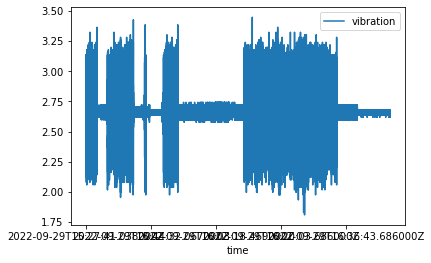

In [4]:
data[(data["time"]>="2022-09-29T15:25:00.000Z") &
     (data["time"]<="2022-09-29T16:50:00.000Z")
    ].plot(x="time",y="vibration")

In [5]:
# # Create and show figure
# px.scatter(
#     data[(data["time"]>="2022-09-29T15:32:00.000Z") &
#      (data["time"]<="2022-09-29T15:42:00.000Z")
#     ],
#     x="time",
#     y="vibration"
# ).show()

In [6]:
data_processed=query_it("select * from processed")
data_processed

,time,density,heading,latitude,longitude,passID,speed,temperature
0,2022-09-29T13:48:53.222000Z,94.97,180.0,0.000000,0.000000,0.0,0.000,101.131714
1,2022-09-29T13:48:53.350000Z,90.24,180.0,0.000000,0.000000,0.0,0.000,100.159724
2,2022-09-29T13:48:53.478000Z,90.03,0.0,37.819975,-121.276682,0.0,0.035,100.475626
3,2022-09-29T13:48:53.606000Z,90.03,0.0,37.819975,-121.276682,0.0,0.035,100.524224
4,2022-09-29T13:48:53.734000Z,90.03,0.0,37.819975,-121.276682,0.0,0.035,101.569115
...,...,...,...,...,...,...,...,...
193096,2022-10-06T16:00:09.870000Z,90.24,180.0,0.000000,0.000000,0.0,0.000,114.982691
193097,2022-10-06T16:00:09.998000Z,90.03,180.0,0.000000,0.000000,0.0,0.000,115.031290
193098,2022-10-06T16:00:10.126000Z,90.03,180.0,0.000000,0.000000,0.0,0.000,115.031290
193099,2022-10-06T16:00:10.254000Z,90.03,180.0,0.000000,0.000000,0.0,0.000,115.079890


In [7]:
# # cores_loc=pd.read_csv("/home/shankar/GRA/R@/rica/projects/lathrop/Lathrop-waypoints.csv")
# # cores_loc


# 	Number 	Name 	Description 	GeometryType 	Latitude 	Longitude 	Altitude 	Density 	Thickness
# 0 	28 	Lathrop, R4, NDG 94.3 	NaN 	Point 	37.819070 	-121.289119 	-0.557 	93.4 	2.7
# 1 	27 	Lathrop, R5, NDG 94.5 	NaN 	Point 	37.819072 	-121.288548 	-0.939 	93.8 	2.8
# 2 	26 	Lathrop, R6, NDG 94 	NaN 	Point 	37.819060 	-121.287912 	-1.676 	92.7 	2.7
# 3 	25 	Lathrop, R3, NDG 95 	NaN 	Point 	37.819033 	-121.290488 	-0.571 	94.0 	2.5
# 4 	24 	Lathrop, R2, NDG 95 	NaN 	Point 	37.819039 	-121.291162 	-2.239 	95.0 	2.4
# 5 	23 	Lathrop, R1, NDG 95 	NaN 	Point 	37.819026 	-121.291552 	-1.122 	95.2 	2.7

In [26]:
core=[[37.819070,-121.289119 ]]

def get_data_to_look(processed_data,latitude,longitude,date=None):
    dlat=0.00001
    dlong=0.000013
    lat_min=latitude-dlat
    lat_max=latitude+dlat
    long_min=longitude-dlong
    long_max=longitude+dlong        
    if date:
        to_look=processed_data[(processed_data["latitude"]>lat_min) &
                     (processed_data["latitude"]<lat_max) &
                     (processed_data['longitude'] >=long_min) &
                     (processed_data['longitude']<=long_max) &
                     (processed_data['time']>= f'{date}T07:00:00Z') &
                     (processed_data['time']<=f'{date}T23:59:00Z')
        ]
    else:
        to_look=processed_data[(processed_data["latitude"]>lat_min) &
                     (processed_data["latitude"]<lat_max) &
                     (processed_data['longitude'] >=long_min) &
                     (processed_data['longitude']<=long_max)]        
    return to_look



look_around_core=get_data_to_look(data_processed,core[0][0],core[0][1])
look_around_core.to_csv("this_may_be_it.csv")

In [1]:
# to_see_data=data_loc[data_loc["latitude"]!=0.000000]
# px.scatter(
#     to_see_data,
#     x="latitude",
#     y="longitude"
# ).show()

In [8]:
time=[["2022-09-29T18:41:33.985000Z","2022-09-29T18:41:35.777000Z"],
     ["2022-09-29T18:42:55.009000Z","2022-09-29T18:42:56.801000Z"],
     ["2022-09-29T18:45:06.977000Z","2022-09-29T18:45:08.769000Z"]]

In [12]:
first=data[(data["time"]>=time[2][0]) &
     (data["time"]<=time[2][1])
    ]
first.to_csv("R4_pass3_lathrop.csv")

# Get the vibration data

In [19]:
a=query_it("select first(vibration) from raw")
b=query_it("select last(vibration) from raw")
print(a,"\n",b)

                          time     first
0  2022-09-29T13:48:53.222000Z  2.659011 
                           time      last
0  2022-10-06T16:00:10.765000Z  2.513858


In [20]:
vib_data_pd=query_betn("2022-09-29T15:00:00.000Z","2022-09-29T15:05:00.000Z","raw")
# vib_data_pd["vibration"][0]=2.3456
# vib_data=np.array(vib_data_pd["vibration"])
# vib_data
vib_data_pd

,time,heading,latitude,longitude,speed,temperature,vibration
0,2022-09-29T15:00:00Z,NaN,NaN,NaN,NaN,102.492504,2.659011
1,2022-09-29T15:00:00.001000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
2,2022-09-29T15:00:00.002000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
3,2022-09-29T15:00:00.003000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
4,2022-09-29T15:00:00.004000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
...,...,...,...,...,...,...,...
299995,2022-09-29T15:04:59.995000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
299996,2022-09-29T15:04:59.996000Z,NaN,NaN,NaN,NaN,102.492504,2.659011
299997,2022-09-29T15:04:59.997000Z,NaN,NaN,NaN,NaN,105.602865,2.659011
299998,2022-09-29T15:04:59.998000Z,NaN,NaN,NaN,NaN,105.602865,2.659011


# Vibration DataClass and function to convert data into list of vibration data 

In [5]:
###

@dataclasses.dataclass
class vibration:
    """vibration datapoint.

    Attributes:
        timestamp (int): timestamp of vibration measurement.
        data (list): recorded vibration data points.
    """

    timestamp: int
    data: list

    @classmethod
    def from_dict(self, d):
        """Create data object from dictionary object."""
        return self(**d)

    def to_dict(self):
        """Return dictionary object."""
        return dataclasses.asdict(self)

    def __add__(self, x):
        """Define custom addition rule."""
        self.data.extend(x.data)
        return self
    
def convert_to_vibration(df):
    """Compute vibration objects from dataframe"""
    vibration_list = []
    for i in range(255, 128 * (len(df) // 128), 128):
        vibration_list.append(
            vibration(
                timestamp=df.loc[i, "time"],
                data=df.loc[i - 255 : i, "vibration"].values,
            )
        )
    return vibration_list

# filterOp calss;;; filterBank class;;;

In [6]:
###

@dataclasses.dataclass
class filterOp:
    """filtered op dsatapoints.

    Attributes:
        timestamp (int): time of first sample
        y: list of seven float values : [y0,y1,y2,y3,y4,y5,y6]
    """

    timestamp: int
    y0: list
    y1: list
    y2: list
    y3: list
    y4: list
    y5: list
    y6: list

    @classmethod
    def from_dict(self, d):
        """Create data object from dictionary object."""
        return self(**d)

    def to_dict(self):
        """Return the values in dictionary form"""
        return dataclasses.asdict(self)
    
    
@dataclasses.dataclass
class filterBank:
    """Filter bank data class to store coefficients

    Initialized with a fundamental frequency

    Args:
        fundFreq (float): Fundamental frequency for filter bank.
    """

    def __init__(self,fundFreq: float = 62.5, fs: int =1000):
        self.F_ORDER = 4
        self._fundFreq = fundFreq
        self._fs = fs
        self._zf = np.zeros([7, 8])
        self._createFilterCoeff()

    @classmethod
    def from_dict(self, d):
        """Create datapoint from dictionary object."""
        return self(**d)

    def to_dict(self):
        """Create dictionary object."""
        return dataclasses.asdict(self)

    @property
    def fundFreq(self):
        return self._fundFreq

    @fundFreq.setter
    def fundFreq(self, fundFreq):
        try:
            if isinstance(fundFreq, float):
                pass
            else:
                fundFreq = float(fundFreq)
            assert isinstance(fundFreq, float)
        except TypeError:
            raise FilterClassError("Fundamental Frequency value must be a float")
        else:
            self._fundFreq = fundFreq
            self._createFilterCoeff()

    def _createFilterCoeff(self):
        """Generate filter coefficients based on fundamental frequency.

        Creates a 7-tap filter bank using bandpass filters located at the fundamental frequency
        and 6 harmonics.

        Filter coefficients are saved as class attributes for later processing.
        """
        self.b0, self.a0 = signal.butter(
            N=self.F_ORDER,
            Wn=[self.fundFreq - 1, self.fundFreq + 1],
            btype="bandpass",
            fs=self._fs,
        )
        self.b1, self.a1 = signal.butter(
            N=self.F_ORDER,
            Wn=[2 * self.fundFreq - 3, 2 * self.fundFreq + 3],
            btype="bandpass",
            fs=self._fs,
        )
        self.b2, self.a2 = signal.butter(
            self.F_ORDER,
            [3 * self.fundFreq - 5, 3 * self.fundFreq + 5],
            "bandpass",
            fs=self._fs,
        )
        self.b3, self.a3 = signal.butter(
            self.F_ORDER,
            [4 * self.fundFreq - 5, 4 * self.fundFreq + 5],
            "bandpass",
            fs=self._fs,
        )
        self.b4, self.a4 = signal.butter(
            self.F_ORDER,
            [5 * self.fundFreq - 5, 5 * self.fundFreq + 5],
            "bandpass",
            fs=self._fs,
        )
        self.b5, self.a5 = signal.butter(
            self.F_ORDER,
            [6 * self.fundFreq - 5, 6 * self.fundFreq + 5],
            "bandpass",
            fs=self._fs,
        )
        self.b6, self.a6 = signal.butter(
            self.F_ORDER,
            [7 * self.fundFreq - 5, 7 * self.fundFreq + 5],
            "bandpass",
            fs=self._fs,
        )

    def filter(self, rawVibration):
        """Filter a vibration signal and return the result as a dictionary"""
        (y0, z0) = signal.lfilter(self.b0, self.a0, x=rawVibration.data, zi=self._zf[0])
        (y1, z1) = signal.lfilter(self.b1, self.a1, x=rawVibration.data, zi=self._zf[1])
        (y2, z2) = signal.lfilter(self.b2, self.a2, x=rawVibration.data, zi=self._zf[2])
        (y3, z3) = signal.lfilter(self.b3, self.a3, x=rawVibration.data, zi=self._zf[3])
        (y4, z4) = signal.lfilter(self.b4, self.a4, x=rawVibration.data, zi=self._zf[4])
        (y5, z5) = signal.lfilter(self.b5, self.a5, x=rawVibration.data, zi=self._zf[5])
        (y6, z6) = signal.lfilter(self.b6, self.a6, x=rawVibration.data, zi=self._zf[6])
        self._zf = np.array([z0, z1, z2, z3, z4, z5, z6])
        return filterOp.from_dict(
            {
                "timestamp": rawVibration.timestamp,
                "y0": y0,
                "y1": y1,
                "y2": y2,
                "y3": y3,
                "y4": y4,
                "y5": y5,
                "y6": y6,
            }
        )

# Dataclass Power and PowerModule to convert the filtered data object into Power Object

In [7]:
###

@dataclasses.dataclass
class Power:
    """Power obejct to hold results of power calculations.

    Args:
        timestamp: int
        total_power: float
        p0: float
        p1: float
        p2: float
        p3: float
        p4: float
        p5: float
        p6: float
    """

    timestamp: int
    total_power: float
    p0: float
    p1: float
    p2: float
    p3: float
    p4: float
    p5: float
    p6: float

    @classmethod
    def from_dict(self, d):
        """Create data object from dictionary object."""
        return self(**d)

    def to_dict(self):
        """Return dictionary object."""
        return dataclasses.asdict(self)

@dataclasses.dataclass
class PowerModule:
    """Calculate power from vibrations.

    Args:
        N (int): Window Size (default=256)
        stepSize (int): Sliding window step-size (default=128)
        fs (int): Sample Frequency of vibration data [Hz] (default=1000)
    """

    fundFreq: float = 45.0
    N: int = 256
    stepSize: int = 128
    fs: float = 1000
    mean: np.array = np.array([0, 0, 0, 0, 0, 0, 0])
    std: np.array = np.array([1, 1, 1, 1, 1, 1, 1])
    K: float = 1.0 / 0.5364

    @classmethod
    def from_dict(self, d):
        """Create datapoint from a dictionary object."""
        return self(**d)

    def to_dict(self):
        """Turn datapoint into a dictionary object."""
        return dataclasses.asdict(self)

    def compute(self, filter_output, normalize=True):
        powerBands = self._computePowerbands(filter_output)
        total_power = self._computeTotalPower(powerBands)
        powerBands.update(total_power)
        print(self.mean,self.std)
#         print(normalize)
        if normalize:
#             print("Normalizing")
            powerBands = self._normalizePower(powerBands)
        else:
            pass
#             print("not norma")
        powerBands.update({"timestamp": filter_output.timestamp})
        return Power.from_dict(powerBands)

    def _normalizePower(self, powerBands):
        """Normalize powerbands according to calibration file"""
        dict_names = ["total_power"]
        [dict_names.append(f"p{i}") for i in range(len(self.mean))]

        for i in range(len(self.mean)):
            powerBands[dict_names[i]] -= self.mean[i]
            powerBands[dict_names[i]] /= self.std[i]
            powerBands[dict_names[i]] = np.clip(powerBands[dict_names[i]], -2, 2)
        return powerBands

    def _computeTotalPower(self, x):
        """Compute total power from powerbands."""
        f = (
            np.array(
                [
                    self.fundFreq,
                    2 * self.fundFreq,
                    3 * self.fundFreq,
                    4 * self.fundFreq,
                    5 * self.fundFreq,
                    6 * self.fundFreq,
                    7 * self.fundFreq,
                ]
            )
            ** 2
        )
        return {
            "total_power": np.matmul(
                f, [x["p0"], x["p1"], x["p2"], x["p3"], x["p4"], x["p5"], x["p6"]]
            )
            / 1000000  # Divide by 1 million is from Paloma's experiments
        }

    def _computePowerbands(self, filterOutput):
        """Calculate powerbands from 7-tap filter output.

        Args:
            filterOutput (filterOp): a filter output object
        Returns:
            p (dict): a dictionary of power outputs
        """
        p0 = self._computePower(filterOutput.y0)
        p1 = self._computePower(filterOutput.y1)
        p2 = self._computePower(filterOutput.y2)
        p3 = self._computePower(filterOutput.y3)
        p4 = self._computePower(filterOutput.y4)
        p5 = self._computePower(filterOutput.y5)
        p6 = self._computePower(filterOutput.y6)
        powerBand = {
            "p0": p0,
            "p1": p1,
            "p2": p2,
            "p3": p3,
            "p4": p4,
            "p5": p5,
            "p6": p6,
        }
        return powerBand

    def _computePower(self, x):
        """Calculate the power of a single input signal.

        For a signal the size of 256, two power points will be computed.
        We will only report the first, which is at t=128ms.

        Args:
            x (np.array): A filtered vibration signal.
        Returns:
            power (np.array): Signal power
        """
        window = np.hamming(self.N)

        y0 = self.K * np.multiply(window, x)
        power = (np.linalg.norm(y0) ** 2) / self.N
        return power

# Calibration for Power and Filter Calculation methods

In [12]:
def estimate_fundFreq(df):

    frequencies, times, spectrogram = signal.spectrogram(
        df.vibration.values,
        1000,
        "boxcar",
        nperseg=256,
        noverlap=128,
        scaling="density",
        mode="magnitude",
    )
#     plt.figure(figsize=(10,50))
#     plt.pcolormesh(times, frequencies, spectrogram)
#     plt.imshow(spectrogram)
#     plt.ylabel('Frequency [Hz]')
#     plt.xlabel('Time [sec]')
#     plt.show()


    S_mean = np.mean(spectrogram, axis=1)
    fundFreq = frequencies[np.argmax(S_mean)]
    try:
        print(f"fundFreq:{fundFreq}")
    except:  # Encountered during unit-test
        print ("Fund freq difficulty")
    return fundFreq


def get_mean_std(power_O):
    """
    get the list of power object and get the mean and std with each of those
    
    O/P:mean= array([8.29435293e-08, 2.80233810e-05, 3.27951217e-05, 2.64883938e-05,
        1.48420347e-05, 9.54587842e-06, 6.67679403e-06, 4.99720963e-06]),
        std = array([3.78414996e-06, 8.95038345e-04, 1.50523947e-03, 1.26197150e-03,
        7.01275731e-04, 4.46176335e-04, 3.07947925e-04, 2.26973899e-04])}
    """
    data=pd.DataFrame([s.to_dict() for s in power_O])
    print("Length of full objects",len(power_O), "\nLen of created ones", len(data["p0"]))
    mean=np.array(data.mean())
    std=np.array(data.std())
    return(mean,std)
        
    

def calibrate(vib_data_pd):
    vib_obj_data=convert_to_vibration(vib_data_pd)  ### vib_data_pd ===> pandas dataframe with time and vibration
    
    fundFreq=estimate_fundFreq(vib_data_pd)
    
    args={"fundFreq": fundFreq, 
      "fs": 1000, 
      "mean": np.array([0, 0, 0, 0, 0, 0, 0]),
      "std": np.array([1, 1, 1, 1, 1, 1, 1])
     }
    
    fb=filterBank.from_dict({"fundFreq": fundFreq, "fs": 1000})         ###Creation of filter bank
    
    filtered_data=[fb.filter(x) for x in vib_obj_data]  ###Using the filterbank create filtered data list
    
    oPower=PowerModule.from_dict(args)   ### Create the PowerModuleused to convert filteres data into power data
    print(oPower.mean,oPower.std)
    power_O=[oPower.compute(x,normalize=False) for x in filtered_data]  ###Conversion of filtered data into power with 7 features each data point
    
    mean, std = get_mean_std(power_O)
    
    return {"fundFreq": fundFreq, 
      "fs": 1000, 
      "mean": mean,
      "std": std
     } 

In [13]:
# calibrate(vib_data_pd)  

# Path to convert the vibration object to power 

In [14]:
# ###

# args={"fundFreq": 62.5, 
#       "fs": 1000, 
#       "mean": np.array([0, 0, 0, 0, 0, 0, 0]),
#       "std": np.array([1, 1, 1, 1, 1, 1, 1])
#      }

def convert_vib_df_to_power_list(vib_data_pd,args,normalize=True):
    """
    Input:
    vib_data_pd= pandas dataframe with time and vibration
    args=arguments to create the filterbank and powerobject
    normalize=weather to get the normalized value or non-normalized values
    
    Output:
    list of power object
    """
    
    vib_obj_data=convert_to_vibration(vib_data_pd)  ### vib_data_pd ===> pandas dataframe with time and vibration
   
    fb=filterBank.from_dict({"fundFreq": args["fundFreq"], "fs": args["fs"]})         ###Creation of filter bank
    
    filtered_data=[fb.filter(x) for x in vib_obj_data]  ###Using the filterbank create filtered data list

    oPower=PowerModule.from_dict(args)   ### Create the PowerModule for the 
    print(args,"\n",oPower.mean,"\n",oPower.std)
    power0=[oPower.compute(x) for x in filtered_data]
    return power0

In [17]:
# Application to get the whole thing
args=calibrate(vib_data_pd)  
print("args",args)
powerO0= convert_vib_df_to_power_list(vib_data_pd=vib_data_pd,args=args,normalize=False)
powerO1= convert_vib_df_to_power_list(vib_data_pd=vib_data_pd,args=args,normalize=True)
powerO0[0]==powerO1[0]

fundFreq:7.8125
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1

[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0

[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0 0 0 0] [1 1 1 1 1 1 1]
[0 0 0 0

/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

{'fundFreq': 7.8125, 'fs': 1000, 'mean': array([8.29435293e-08, 2.80233810e-05, 3.27951217e-05, 2.64883938e-05,
       1.48420347e-05, 9.54587842e-06, 6.67679403e-06, 4.99720963e-06]), 'std': array([3.78414996e-06, 8.95038345e-04, 1.50523947e-03, 1.26197150e-03,
       7.01275731e-04, 4.46176335e-04, 3.07947925e-04, 2.26973899e-04])} 
 [8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] 
 [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03

[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 2.80233810e-05 3.27951217e-05 2.64883938e-05
 1.48420347e-05 9.54587842e-06 6.67679403e-06 4.99720963e-06] [3.78414996e-06 8.95038345e-04 1.50523947e-03 1.26197150e-03
 7.01275731e-04 4.46176335e-04 3.07947925e-04 2.26973899e-04]
[8.29435293e-08 

True

In [186]:
powerO0= convert_vib_df_to_power_list(vib_data_pd=vib_data_pd,args=args,normalize=False)
powerO1= convert_vib_df_to_power_list(vib_data_pd=vib_data_pd,args=args,normalize=True)

print(len(powerO0), len(powerO1))

2342 2342


dict_keys(['total_power', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6'])

In [ ]:
def to_dict(self):
        return {
            'x': self.x,
            'y': self.y,
        }

In [159]:
args={"fundFreq": 62.5, 
      "fs": 1000, 
      "mean": np.array([0, 0, 0, 0, 0, 0, 0]),
      "std": np.array([1, 1, 1, 1, 1, 1, 1])
     }

In [160]:
vib_obj_data=convert_to_vibration(vib_data_pd)  ### vib_data_pd ===> pandas dataframe with time and vibration
   
fb=filterBank.from_dict({"fundFreq": args["fundFreq"], "fs": args["fs"]})         ###Creation of filter bank

# filtered_data=[fb.filter(x) for x in vib_obj_data]  ###Using the filterbank create filtered data list
filtered_data=fb.filter(vib_obj_data[0])

oPower=PowerModule.from_dict(args)   ### Create the PowerModule for the 
power0=oPower.compute(filtered_data)
power0

Power(timestamp='2022-09-29T15:00:00.255000Z', total_power=0.00018380668386313884, p0=2.1834922465941068e-05, p1=0.0011329392102741643, p2=0.000892123133045567, p3=0.0005012273205281943, p4=0.00034758549394443437, p5=0.00023610728660429804, p6=0.00018903416965661523)